In [15]:
import pandas as pd

dataset = pd.read_csv("../datasets/penguins.csv")

feature_names = [
    "Culmen Length (mm)",
    "Culmen Depth (mm)",
    "Flipper Length (mm)",
]
target_name = "Body Mass (g)"

dataset = dataset[feature_names + [target_name]].dropna(axis="rows", how="any")
dataset = dataset.sample(frac=1, random_state=0).reset_index(drop=True)
data, target = dataset[feature_names], dataset[target_name]

In [16]:
#Q1

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

decision_tree = DecisionTreeRegressor(random_state=0)
random_forest = RandomForestRegressor(random_state=0)

cv_results_decision_tree = cross_validate(
    decision_tree,
    data,
    target,
    cv=10,
    return_train_score=True
)

cv_results_random_forest = cross_validate(
    random_forest,
    data,
    target,
    cv=10,
    return_train_score=True
)

count = 0
for tree, random_forest in zip(cv_results_decision_tree["test_score"], cv_results_random_forest["test_score"]):
    if (tree < random_forest):
        count += 1
        
print(f'the random forest model is better in {count} situations')

the random forest model is better in 10 situations


In [17]:
# Q2

random_forest_5 = RandomForestRegressor(n_estimators=5, random_state=0)
random_forest_100 = RandomForestRegressor(n_estimators=100, random_state=0)


cv_results_random_forest_5 = cross_validate(
    random_forest_5,
    data,
    target,
    cv=10,
    return_train_score=True
)

cv_results_random_forest_100 = cross_validate(
    random_forest_100,
    data,
    target,
    cv=10,
    return_train_score=True
)

count = 0
for random_forest_5, random_forest_100 in zip(cv_results_random_forest_5["test_score"], cv_results_random_forest_100["test_score"]):
    if (random_forest_5 < random_forest_100):
        count += 1
        
print(f'the random forest with 100 trees is better in {count} situations')

the random forest with 100 trees is better in 9 situations


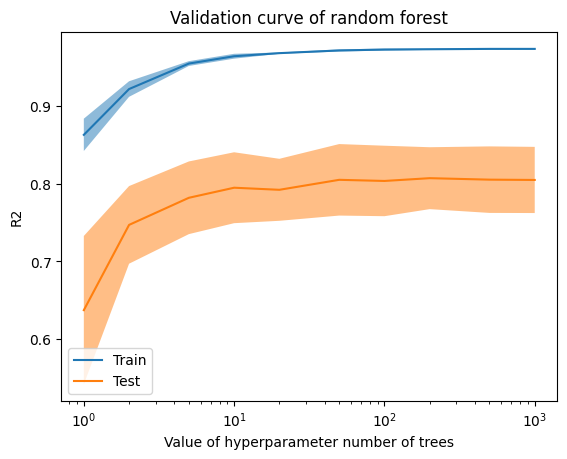

In [18]:
#Q3 
from sklearn.model_selection import ValidationCurveDisplay
import numpy as np

random_forest = RandomForestRegressor()

n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

disp = ValidationCurveDisplay.from_estimator(
    random_forest,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    # scoring="neg_median_absolute_error"
    scoring="r2",
    cv=10
) # default score : accuracy

_ = disp.ax_.set(
    xlabel=r"Value of hyperparameter number of trees",
    title="Validation curve of random forest",
)



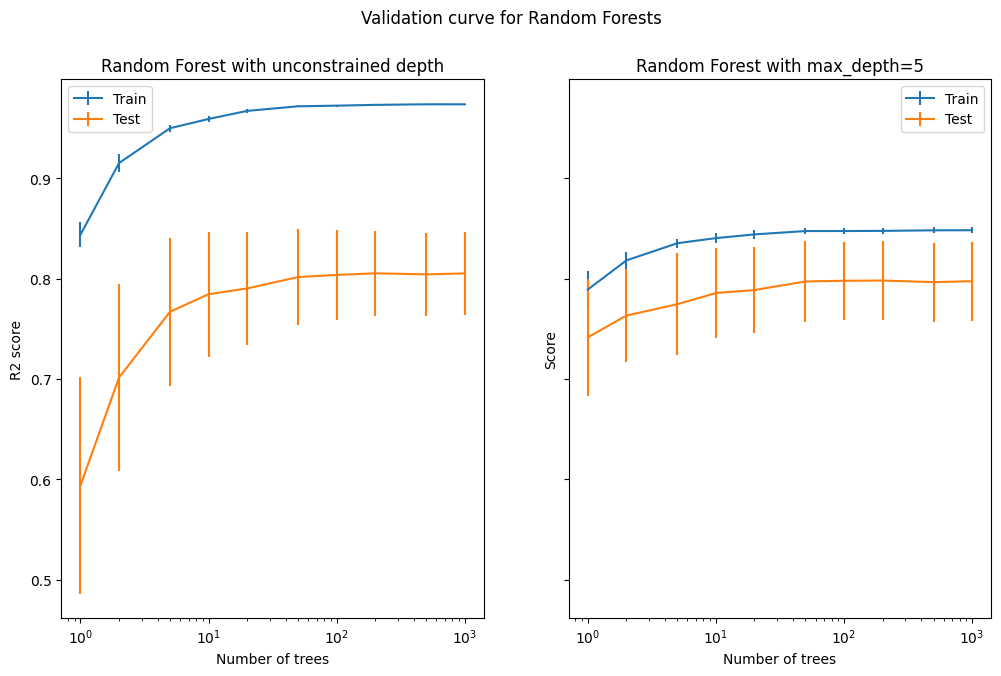

In [19]:
#Q4

from sklearn.model_selection import ValidationCurveDisplay
import numpy as np
import matplotlib.pyplot as plt

random_forest = RandomForestRegressor(random_state=0)
random_forest_limited = RandomForestRegressor(max_depth=3, random_state=0)

n_estimators = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500, 1_000])

fig, axs = plt.subplots(ncols=2, figsize=(12, 7),  sharey=True)
ValidationCurveDisplay.from_estimator(
    random_forest,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    scoring="r2",
    score_name="R2 score",
    std_display_style="errorbar",
    cv=10,
    n_jobs=2,
    ax=axs[0]
)
ValidationCurveDisplay.from_estimator(
    random_forest_limited,
    data,
    target,
    param_name="n_estimators",
    param_range=n_estimators,
    std_display_style="errorbar",
    cv=10,
    n_jobs=2,
    ax=axs[1],
)

axs[0].set(
    xlabel="Number of trees",
    title="Random Forest with unconstrained depth",
)
axs[1].set(
    xlabel="Number of trees",
    title="Random Forest with max_depth=5",
)
_ = fig.suptitle("Validation curve for Random Forests")





In [21]:
#Q5

rf_1_tree = RandomForestRegressor(n_estimators=1, random_state=0)
cv_results_tree = cross_validate(
    rf_1_tree, data, target, cv=10, return_train_score=True
)
print(cv_results_tree["train_score"])


tree = DecisionTreeRegressor(random_state=0)
cv_results_tree = cross_validate(
    tree, data, target, cv=10, return_train_score=True
)
print(cv_results_tree["train_score"])

[0.83120264 0.83309064 0.83195043 0.84834224 0.85790323 0.86235297
 0.84791111 0.85183089 0.82241954 0.85045978]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


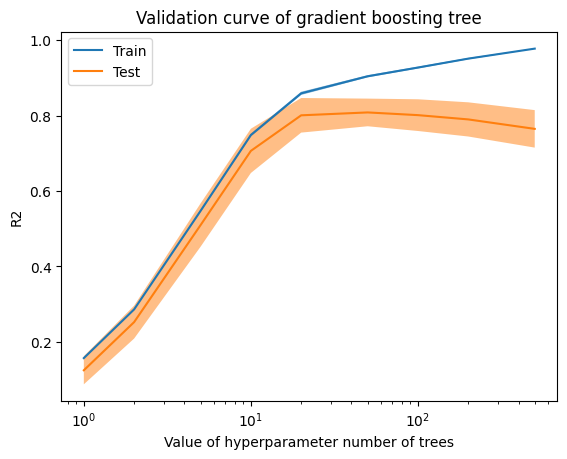

In [27]:
#Q6
from sklearn.ensemble import HistGradientBoostingRegressor

hist_gradient_boosting = HistGradientBoostingRegressor(random_state=0)

max_iters = np.array([1, 2, 5, 10, 20, 50, 100, 200, 500])

disp = ValidationCurveDisplay.from_estimator(
    hist_gradient_boosting,
    data,
    target,
    param_name="max_iter",
    param_range=max_iters,
    # scoring="neg_median_absolute_error"
    scoring="r2",
    cv=10
) # default score : accuracy

_ = disp.ax_.set(
    xlabel=r"Value of hyperparameter number of trees",
    title="Validation curve of gradient boosting tree",
)
